In [1]:
import numpy as np
import numpy.random as rnd
from gen_fractal import gen_fractal

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

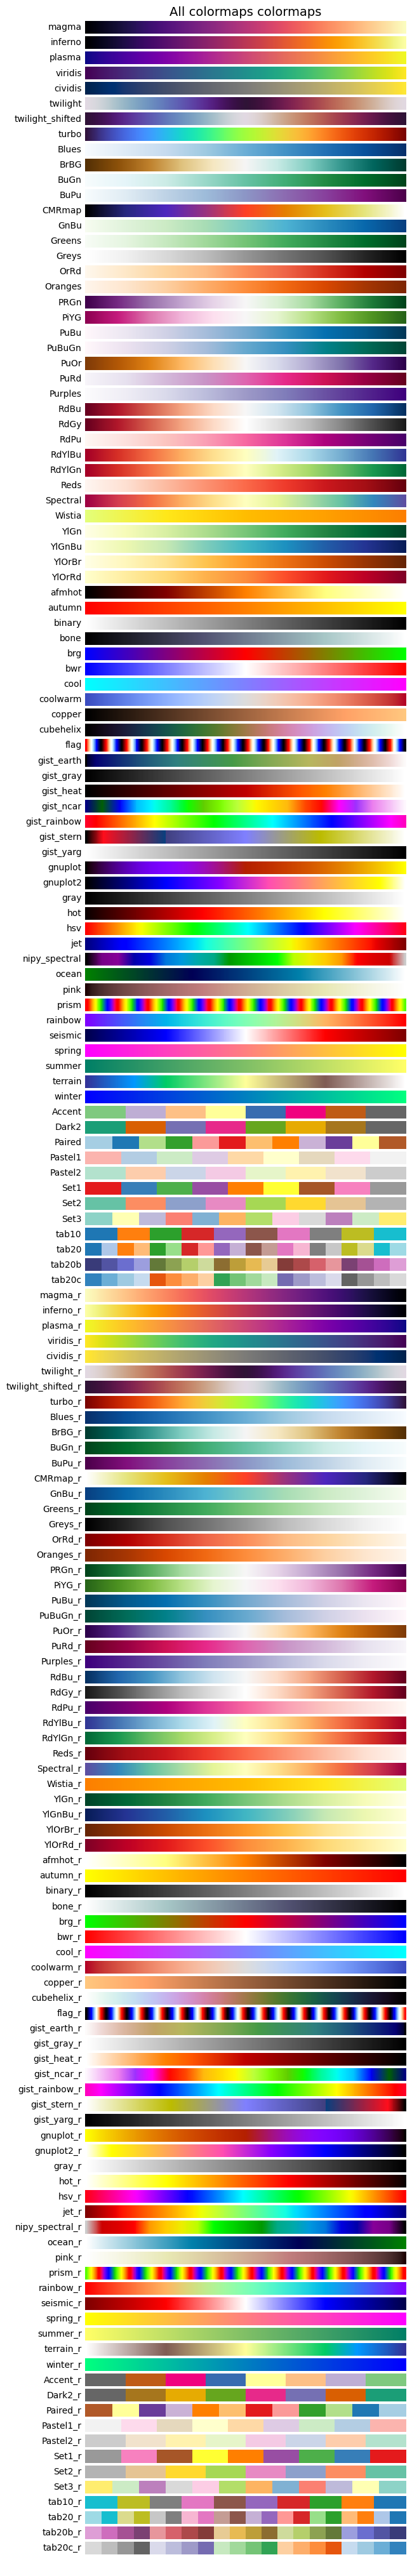

In [2]:
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list
plot_color_gradients('All colormaps',
                     plt.colormaps())

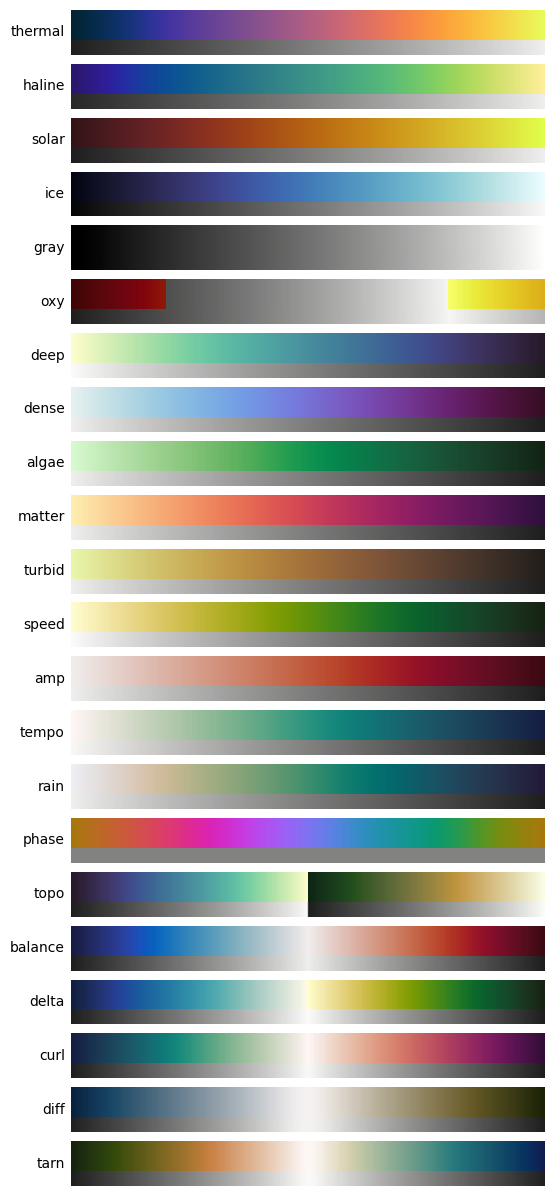

In [4]:
import cmocean as cmx
import cmocean.plots as cmp
cmp.plot_gallery()

In [5]:
x, y = np.mgrid[-1:1:64j, -1:1:64j]
r = np.sqrt(x**2 + y**2)

### Some simple data
Let's just start with some simple data: a double gaussian

In [6]:
z = (1.0/(0.5*np.sqrt(2*np.pi))) * np.exp(-0.5*(r/0.5)**2)
z += (1.0/(0.15*np.sqrt(2*np.pi))) * np.exp(-0.5*(r/0.15)**2)

### Why color maps matter!
Here we compare the often used rainbow colormaps to other color maps.

Note that the rainbow maps often lead to artifacts that seem to hint at some form of structure. What is smooth structures appear 

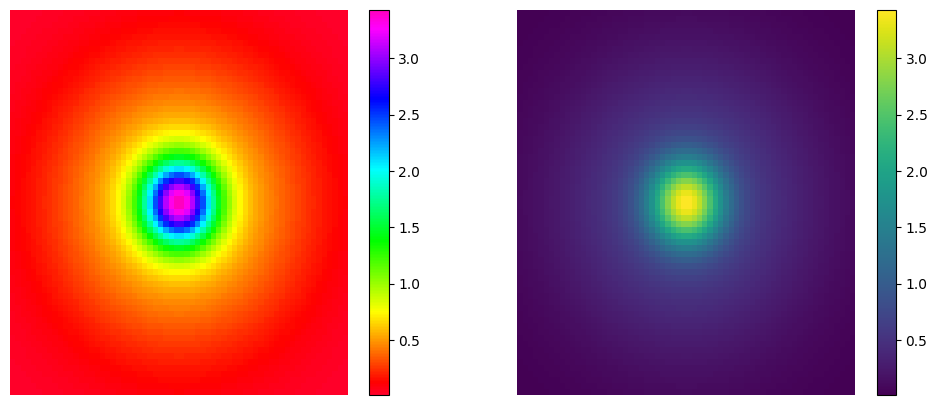

In [7]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
pcm1 = ax.pcolormesh(x, y, z, cmap=plt.cm.gist_rainbow)
pcm2 = ax2.pcolormesh(x, y, z, cmap=plt.cm.viridis)
leg1 = fig.colorbar(pcm1, ax=ax)
leg2 = fig.colorbar(pcm2, ax=ax2)
ax.axis('off'); ax2.axis('off')
plt.show()

In [8]:
zoff = np.exp(-2.0*r)*np.cos(12.0*r)

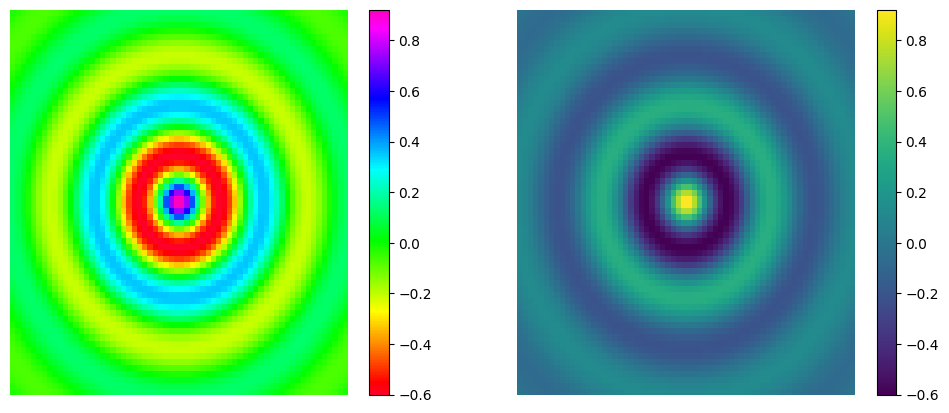

In [9]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
pcm1 = ax.pcolormesh(x, y, zoff, cmap=plt.cm.gist_rainbow)
pcm2 = ax2.pcolormesh(x, y, zoff, cmap=plt.cm.viridis)
leg1 = fig.colorbar(pcm1, ax=ax)
leg2 = fig.colorbar(pcm2, ax=ax2)
ax.axis('off'); ax2.axis('off')
plt.show()

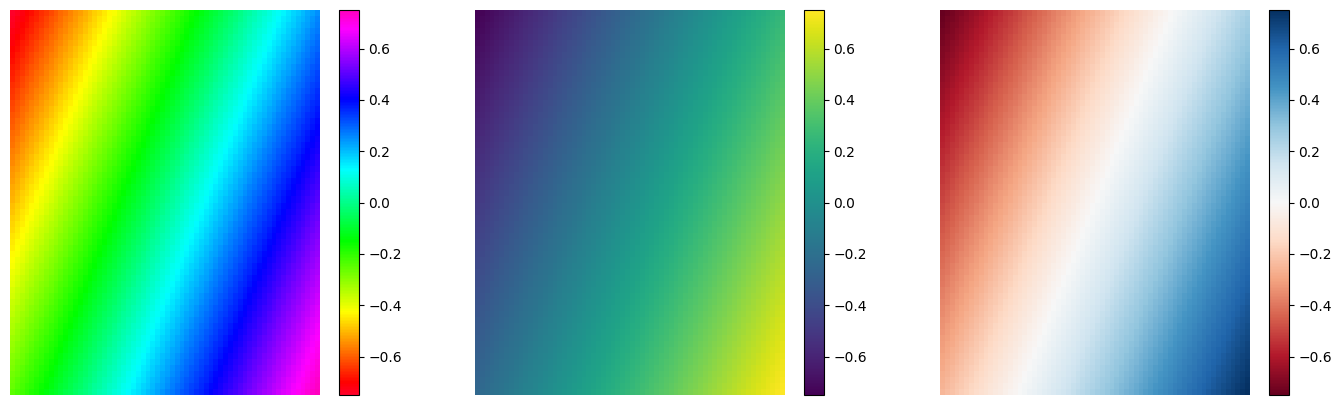

In [10]:
zlin = 0.5*x - 0.25*y
fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
pcm1 = ax.pcolormesh(x, y, zlin, cmap=plt.cm.gist_rainbow)
pcm2 = ax2.pcolormesh(x, y, zlin, cmap=plt.cm.viridis)
pcm3 = ax3.pcolormesh(x, y, zlin, cmap=plt.cm.RdBu)
leg1 = fig.colorbar(pcm1, ax=ax)
leg2 = fig.colorbar(pcm2, ax=ax2)
leg3 = fig.colorbar(pcm3, ax=ax3)
ax.axis('off'); ax2.axis('off'); ax3.axis('off')
plt.show()

### More realistic data
Let's make a fractal (see the attached code for how to do this). This fractal is generated, theoretically, through inverse fourier transform of a pink noise spectrum (white noise + radial profile in fourier space). The function `gen_fractal(N, D)` returns an cube of (N,N,N) with fractal dimension D.

In [11]:
dens = gen_fractal(128, 2.5)
xx = np.linspace(-1,1,128)
yy = np.linspace(-1,1,128)
col = np.nansum(dens, axis=2)

/Users/brandt/projects/DataVisTutorial/gen_fractal.py:27: RuntimeWarning: divide by zero encountered in double_scalars
  amp = np.sqrt(float(1.0/(freq/ndim)**beta))
/Users/brandt/projects/DataVisTutorial/gen_fractal.py:58: ComplexWarning: Casting complex values to real discards the imaginary part
  fbmcube=np.sqrt(ffdata**2).astype('float64')


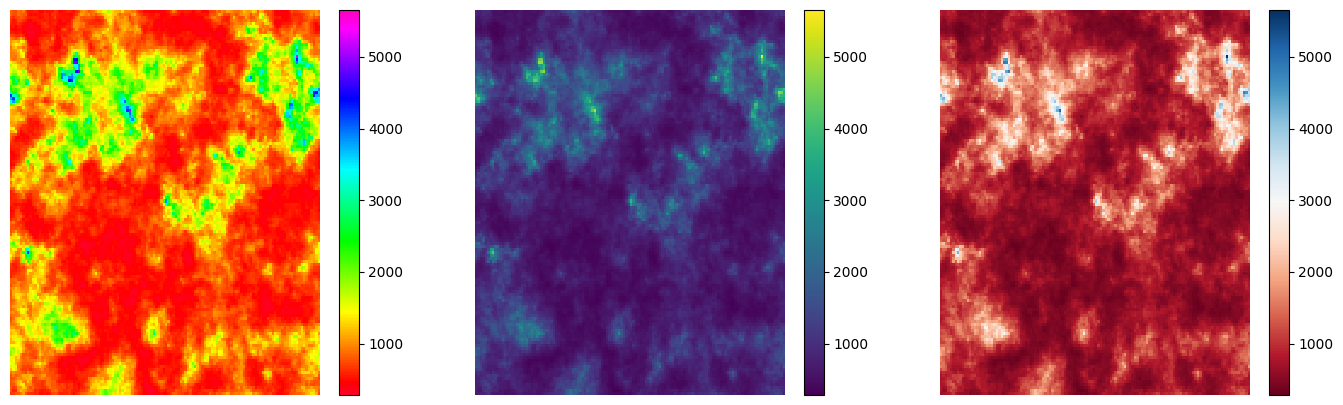

In [12]:
fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
pcm1 = ax.pcolormesh(xx, yy, col, cmap=plt.cm.gist_rainbow)
pcm2 = ax2.pcolormesh(xx, yy, col, cmap=plt.cm.viridis)
pcm3 = ax3.pcolormesh(xx, yy, col, cmap=plt.cm.RdBu)
leg1 = fig.colorbar(pcm1, ax=ax)
leg2 = fig.colorbar(pcm2, ax=ax2)
leg3 = fig.colorbar(pcm3, ax=ax3)
ax.axis('off'); ax2.axis('off'); ax3.axis('off')
plt.show()

This is in linear space, so lets see what happens if we go to log space. Notice how the rainbow spectrum and the diverging spectrum both create distinct features due to the coloring. Pink->Blue->Cyan->Green is less than order of magnitude difference! Similarly, for diverging maps, going from blue to red within a factor of 3-4.

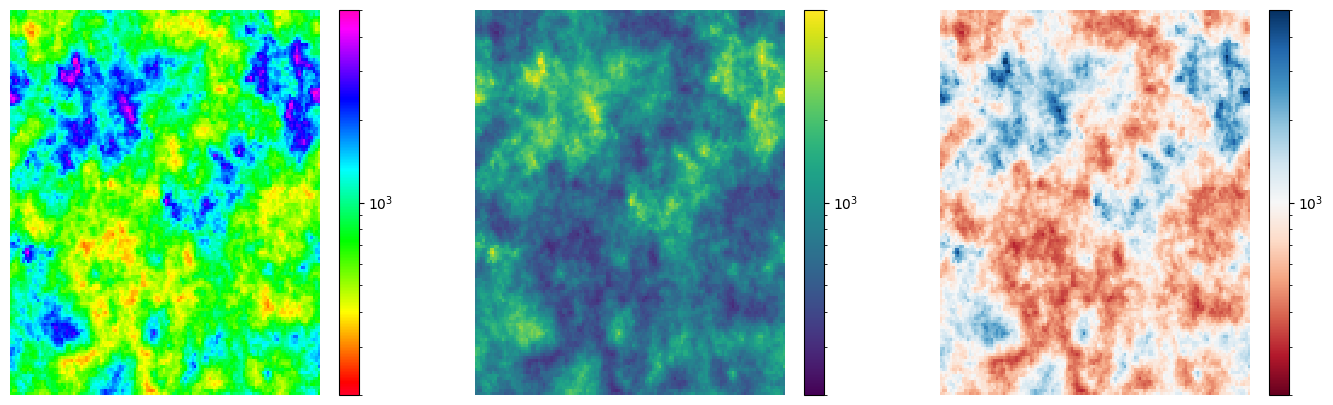

In [13]:
fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
pcm1 = ax.pcolormesh(xx, yy, col, cmap=plt.cm.gist_rainbow, norm=LogNorm(2E2, 5000))
pcm2 = ax2.pcolormesh(xx, yy, col, cmap=plt.cm.viridis, norm=LogNorm(2E2, 5000))
pcm3 = ax3.pcolormesh(xx, yy, col, cmap=plt.cm.RdBu, norm=LogNorm(2E2, 5000))
leg1 = fig.colorbar(pcm1, ax=ax)
leg2 = fig.colorbar(pcm2, ax=ax2)
leg3 = fig.colorbar(pcm3, ax=ax3)
ax.axis('off'); ax2.axis('off'); ax3.axis('off')
plt.show()